<a href="https://colab.research.google.com/github/cariebear/MLClass/blob/master/Copy_of_Copy_of_SeperateData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import shutil
 
dir = '/tmp/n72d_epgate_k60f'
shutil.rmtree(dir)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.metrics import classification_report, confusion_matrix
  
# deep learning libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
  
import cv2
  
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/n72d_epgate_k60f.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

Mounted at /content/drive


In [3]:
import os
import shutil
import random
import glob
os.chdir('/tmp/n72d_epgate_k60f')
#if os.path.isdir('2') is False:
os.makedirs('2')
os.makedirs('10')
os.makedirs('3')
os.makedirs('25')
os.makedirs('30')
os.makedirs('50')
os.makedirs('60')
os.makedirs('70')
os.makedirs('80')
os.makedirs('95')
os.makedirs('98')
os.makedirs('110')
os.makedirs('120')
os.makedirs('123')
os.makedirs('125')
os.makedirs('130')
os.makedirs('150')
os.makedirs('160')
os.makedirs('170')
os.makedirs('180')
os.makedirs('198')

for c in glob.glob('2.*'):	
  shutil.move(c, '2')
for c in glob.glob('10.*'):	
  shutil.move(c, '10')
for c in glob.glob('3.*'):	
  shutil.move(c, '3')
for c in glob.glob('25.*'):	
  shutil.move(c, '25')
for c in glob.glob('30.*'):	
  shutil.move(c, '30')
for c in glob.glob('50.*'):	
  shutil.move(c, '50')
for c in glob.glob('60.*'):	
  shutil.move(c, '60')
for c in glob.glob('70.*'):	
  shutil.move(c, '70')
for c in glob.glob('80.*'):	
  shutil.move(c, '80')
for c in glob.glob('95.*'):	
  shutil.move(c, '95')
for c in glob.glob('98.*'):	
  shutil.move(c, '98')
for c in glob.glob('110.*'):	
  shutil.move(c, '110')
for c in glob.glob('120.*'):	
  shutil.move(c, '120')
for c in glob.glob('123.*'):	
  shutil.move(c, '123')
for c in glob.glob('125.*'):	
  shutil.move(c, '125')
for c in glob.glob('130.*'):	
  shutil.move(c, '130')
for c in glob.glob('150.*'):	
  shutil.move(c, '150')
for c in glob.glob('160.*'):	
  shutil.move(c, '160')
for c in glob.glob('170.*'):	
  shutil.move(c, '170')
for c in glob.glob('180.*'):	
  shutil.move(c, '180')
for c in glob.glob('198.*'):	
  shutil.move(c, '198')



In [4]:
from sklearn.model_selection import train_test_split
rootdir= '/tmp/n72d_epgate_k60f' #path of the original folder

classes = ['2', '10', '3', '25', '30', '50', '60', '70', '80', '95', '98', '110', '120', '123', '125', '130', '150', '160', '170', '180', '198']

for i in classes:

  os.makedirs(rootdir +'/train/' + i)

  os.makedirs(rootdir +'/test/' + i)

  source = rootdir + '/' + i

  allFileNames = os.listdir(source)

  np.random.shuffle(allFileNames)

  test_ratio = 0.25

  train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                        [int(len(allFileNames)* (1 - test_ratio))])
  
  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in test_FileNames:
    shutil.copy(name, rootdir +'/test/' + i)

In [5]:
'''
folder = r'/tmp/n72d_epgate_k60f/train'
subfolders = [f.path for f in os.scandir(folder) if f.is_dir()]

for sub in subfolders:
    for f in os.listdir(sub):
        src = os.path.join(sub, f)
        dst = os.path.join(folder, f)
        shutil.move(src, dst)

folder = r'/tmp/n72d_epgate_k60f/test'
subfolders = [f.path for f in os.scandir(folder) if f.is_dir()]

for sub in subfolders:
    for f in os.listdir(sub):
        src = os.path.join(sub, f)
        dst = os.path.join(folder, f)
        shutil.move(src, dst)
'''
folder = r'/tmp/n72d_epgate_k60f/test'
subfolders = [f.path for f in os.scandir(folder) if f.is_dir()]

for sub in subfolders:
    for f in os.listdir(sub):
        src = os.path.join(sub, f)
        dst = os.path.join(folder, f)
        shutil.move(src, dst)

folder1 = r'/tmp/n72d_epgate_k60f/train'
subfolders1 = [f.path for f in os.scandir(folder1) if f.is_dir()]

for sub1 in subfolders1:
    for f in os.listdir(sub1):
        src1 = os.path.join(sub1, f)
        dst1 = os.path.join(folder1, f)
        shutil.move(src1, dst1)


# datasets
labels = pd.read_csv("/content/drive/My Drive/labels.csv")
sample = pd.read_csv('/content/drive/My Drive/sample_submission.csv')


  
# folders paths
train_path = '/tmp/n72d_epgate_k60f/train/'
test_path = '/tmp/n72d_epgate_k60f/test/'

In [6]:
labels.head()

,id,Defect
0,2.1,NKOptNoSEMV
1,2.2,NKOptNoSEMV
2,2.3,NKOptNoSEMV
3,2.4,NKOptNoSEMV
4,2.5,NKOptNoSEMV


In [7]:
def to_jpg(id):
    return str(id)+'.jpg'
  
  
labels['id'] = labels['id'].apply(to_jpg)
sample['id'] = sample['id'].apply(to_jpg)

In [8]:
# Data agumentation and pre-processing using tensorflow
gen = ImageDataGenerator(
                  rescale=1./255.,
                  horizontal_flip = True,
                  validation_split=0.2 # training: 80% data, validation: 20% data
                 )
  
train_generator = gen.flow_from_dataframe(
    labels, # dataframe
    directory = train_path, # images data path / folder in which images are there
    x_col = 'id',
    y_col = 'Defect',
    subset="training",
    color_mode="rgb",
    target_size = (331,331), # image height , image width
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
)
  
  
validation_generator = gen.flow_from_dataframe(
    labels, # dataframe
    directory = train_path, # images data path / folder in which images are there
    x_col = 'id',
    y_col = 'Defect',
    subset="validation",
    color_mode="rgb",
    target_size = (331,331), # image height , image width
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42,
)

Found 4955 validated image filenames belonging to 21 classes.
Found 1238 validated image filenames belonging to 21 classes.


In [9]:
X_train,y_train = next(train_generator)
X_train.shape # input shape of one record is (331,331,3) , 32: is the batch size

X_test, y_test = next(validation_generator)

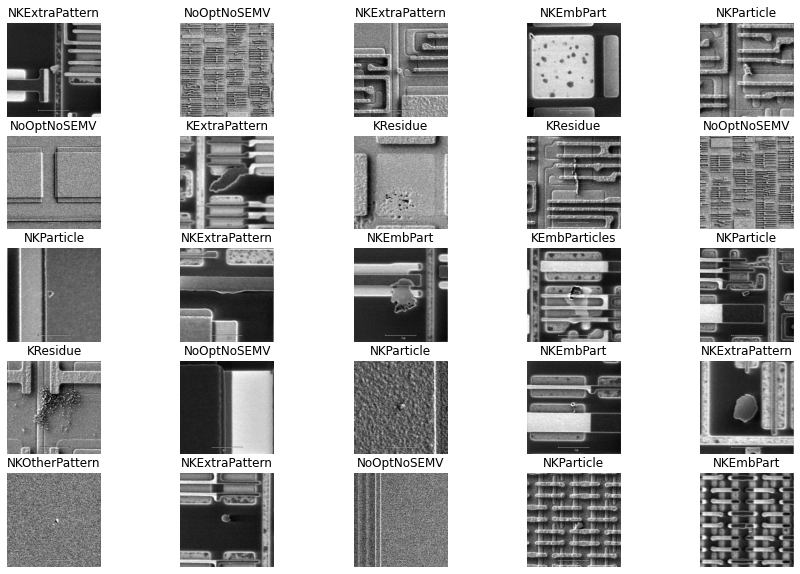

In [10]:
a = train_generator.class_indices
class_names = list(a.keys()) # storing class/breed names in a list
  
def plot_images(img,labels):
    plt.figure(figsize=[15,10])
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(img[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
          
plot_images(X_train,y_train)

In [11]:
import tensorflow as tf


class AlexNetModel:

    """
    All the values used for initialization are as according to the paper mentioned.
    More about cross entropy used below in the code, refer

    https://towardsdatascience.com/cross-entropy-from-an-information-theory-point-of-view-456b34fd939d
    """
    def __init__(self, width=227, height=227, channels=3, no_classes=1000, learning_rate=0.01, momentum=0.9, keep_prob=0.5):

        self.width = width
        self.height = height
        self.channels = channels
        self.no_classes = no_classes
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.keep_prob = keep_prob

        self.random_mean = 0
        self.random_stddev = 0.01

        """
        According to paper, the neuron biases in the second, fourth, and fifth convolutional layers, as well
        as in the fully-connected hidden layers are initialized with the constant 1.
        The neuron biases in the remaining layers are initialized with the constant 0.
        """
        tf.compat.v1.disable_eager_execution()

        with tf.name_scope('input'):
            self.X = tf.compat.v1.placeholder(dtype=tf.float32,
                                    shape=[None, self.height, self.width, self.channels], name='X')

        with tf.name_scope('labels'):
            self.Y = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, self.no_classes], name='Y')

        with tf.name_scope('dropout'):
            self.dropout_act_prob = tf.compat.v1.placeholder(dtype=tf.float32, shape=(), name='dropout_act_prob')

        # Layer 1
        with tf.name_scope('layer1'):
            layer1_acts = self.get_activations(input=self.X, filter_width=11, filter_height=11, filters_count=96,
                                             stride_x=4, stride_y=4, padding='VALID',
                                             init_biases_with_the_constant_1=False)
            layer1_normalized = self.normalized_value(input=layer1_acts)
            layer1 = self.get_max_pool(input=layer1_normalized, filter_width=3, filter_height=3, stride_x=2, stride_y=2,
                                          padding='VALID')

        # Layer 2
        with tf.name_scope('layer2'):
            layer2_acts = self.get_activations(input=layer1, filter_width=5, filter_height=5, filters_count=256,
                                             stride_x=1, stride_y=1, padding='SAME',
                                             init_biases_with_the_constant_1=True)
            layer2_normalized = self.normalized_value(input=layer2_acts)
            layer2 = self.get_max_pool(input=layer2_normalized, filter_width=3, filter_height=3, stride_x=2, stride_y=2,
                                          padding='VALID')

        # Layer 3.
        with tf.name_scope('layer3'):
            layer3 = self.get_activations(input=layer2, filter_width=3, filter_height=3, filters_count=384,
                                             stride_x=1, stride_y=1, padding='SAME',
                                             init_biases_with_the_constant_1=False)

        # Layer 4.
        with tf.name_scope('layer4'):
            layer4 = self.get_activations(input=layer3, filter_width=3, filter_height=3,
                                             filters_count=384, stride_x=1, stride_y=1, padding='SAME',
                                             init_biases_with_the_constant_1=True)

        # Layer 5.
        with tf.name_scope('layer5'):
            layer5_acts = self.get_activations(input=layer4, filter_width=3, filter_height=3,
                                             filters_count=256, stride_x=1, stride_y=1, padding='SAME',
                                             init_biases_with_the_constant_1=True)
            layer5 = self.get_max_pool(input=layer5_acts, filter_width=3, filter_height=3, stride_x=2,
                                          stride_y=2, padding='VALID')

        # Layer 6.
        with tf.name_scope('layer6'):
            layer5_shape = layer5.get_shape().as_list()
            flattened_input_size = layer5_shape[1] * layer5_shape[2] * layer5_shape[3]
            layer6 = self.fully_connected(input=tf.reshape(layer5, shape=[-1, flattened_input_size]),
                                               inputs_count=flattened_input_size, outputs_count=4096, relu=True,
                                               init_biases_with_the_constant_1=True)
            layer6_with_dropout = self.dropout(input=layer6, name='dropout')

        # Layer 7.
        with tf.name_scope('layer7'):
            layer7 = self.fully_connected(input=layer6_with_dropout, inputs_count=4096, outputs_count=4096, relu=True,
                                               init_biases_with_the_constant_1=True)
            layer7_with_dropout = self.dropout(input=layer7, name='dropout')

        # Layer 8.
        with tf.name_scope('layer8'):
            layer8 = self.fully_connected(input=layer7_with_dropout, inputs_count=4096,
                                                   outputs_count=self.no_classes, relu=False, name='logits')

        # Cross Entropy.
        with tf.name_scope('cross_entropy'):
            cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer8, labels=self.Y,
                                                                       name='cross_entropy')
            self.summary(cross_entropy)

        with tf.name_scope('training'):
            loss_operation = tf.reduce_mean(cross_entropy, name='loss_operation')
            tf.summary.scalar(name='loss', data=loss_operation)

            momentum_optimizer = tf.compat.v1.train.MomentumOptimizer(learning_rate=self.learning_rate, momentum=self.momentum)

            gradients = momentum_optimizer.compute_gradients(loss_operation)
            self.training_operation = momentum_optimizer.apply_gradients(gradients, name='training_operation')

            for gradient, variable in gradients:
                if gradient is not None:
                    with tf.name_scope(variable.op.name + '/gradients'):
                        self.summary(gradient)

        with tf.name_scope('accuracy'):
            correct_prediction = tf.math.equal(tf.argmax(layer8, 1), tf.argmax(self.Y, 1), name='correct_prediction')
            self.accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy_operation')
            tf.compat.v1.summary.scalar(name='accuracy', tensor=self.accuracy_operation)

    # Stochastic gradient descent with a batch size of 128.
    def sgd(self, tf_session, X_data, Y_data, batch_size=128, file_writer=None, summary_operation=None,
                    epoch_number=None):
        num_examples = len(X_data)
        step = 0
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_data[offset:end], Y_data[offset:end]
            if file_writer is not None and summary_operation is not None:
                _, summary = tf_session.run([self.training_operation, summary_operation],
                                      feed_dict={self.X: batch_x, self.Y: batch_y,
                                                 self.dropout_act_prob: self.keep_prob})
                file_writer.add_summary(summary, epoch_number * (num_examples // batch_size + 1) + step)
                step += 1
            else:
                tf_session.run(self.training_operation, feed_dict={self.X: batch_x, self.Y: batch_y,
                                                             self.dropout_act_prob: self.keep_prob})

    def evaluate(self, tf_session, X_data, Y_data, batch_size=128):
        num_examples = len(X_data)
        total_accuracy = 0
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_data[offset:end], Y_data[offset:end]
            batch_accuracy = tf_session.run(self.accuracy_operation, feed_dict={self.X: batch_x, self.Y: batch_y,
                                                                          self.dropout_act_prob: 1.0})
            total_accuracy += (batch_accuracy * len(batch_x))
        return total_accuracy / num_examples

    def save(self, tf_session, file_name):
        saver = tf.compat.v1.train.Saver()
        saver.save(tf_session, file_name)

    def restore(self, tf_session, checkpoint_dir):
        saver = tf.train.Saver()
        saver.restore(tf_session, tf.train.latest_checkpoint(checkpoint_dir))

    def random_values(self, shape):
        return tf.random.normal(shape=shape, mean=self.random_mean, stddev=self.random_stddev, dtype=tf.float32)

    def summary(self, var):
        mean = tf.reduce_mean(var)
        stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('mean', mean)
        tf.summary.scalar('stddev', stddev)
        tf.summary.histogram('histogram', var)

    def get_activations(self, input, filter_width, filter_height, filters_count, stride_x, stride_y, padding='VALID',
               init_biases_with_the_constant_1=False, name='conv'):
        with tf.name_scope(name):
            input_channels = input.get_shape()[-1]
            filters = tf.Variable(
                self.random_values(shape=[filter_height, filter_width, input_channels, filters_count]),
                name='filters')
            convs = tf.nn.conv2d(input=input, filters=filters, strides=[1, stride_y, stride_x, 1], padding=padding,
                                 name='convs')
            if init_biases_with_the_constant_1:
                biases = tf.Variable(tf.ones(shape=[filters_count], dtype=tf.float32), name='biases')
            else:
                biases = tf.Variable(tf.zeros(shape=[filters_count], dtype=tf.float32), name='biases')
            preactivations = tf.nn.bias_add(convs, biases, name='preactivations')
            activations = tf.nn.relu(preactivations, name='activations')

            with tf.name_scope('filter_summaries'):
                self.summary(filters)

            with tf.name_scope('bias_summaries'):
                self.summary(biases)

            with tf.name_scope('preactivations_histogram'):
                tf.summary.histogram('preactivations', preactivations)

            with tf.name_scope('activations_histogram'):
                tf.summary.histogram('activations', activations)

            return activations

    def normalized_value(self, input, name='lrn'):
        # From article: Local Response Normalization: we used k=2, n=5, α=10^−4, and β=0.75.
        with tf.name_scope(name):
            lrn = tf.nn.local_response_normalization(input=input, depth_radius=2, alpha=10 ** -4,
                                                     beta=0.75, name='local_response_normalization')
            return lrn

    def get_max_pool(self, input, filter_width, filter_height, stride_x, stride_y, padding='VALID', name='pool'):
        with tf.name_scope(name):
            pool = tf.nn.max_pool(input, ksize=[1, filter_height, filter_width, 1], strides=[1, stride_y, stride_x, 1],
                                  padding=padding, name='pool')
            return pool

    def fully_connected(self, input, inputs_count, outputs_count, relu=True, init_biases_with_the_constant_1=False,
                          name='fully_connected'):
        with tf.name_scope(name):
            wights = tf.Variable(self.random_values(shape=[inputs_count, outputs_count]), name='wights')
            if init_biases_with_the_constant_1:
                biases = tf.Variable(tf.ones(shape=[outputs_count], dtype=tf.float32), name='biases')
            else:
                biases = tf.Variable(tf.zeros(shape=[outputs_count], dtype=tf.float32), name='biases')
            preactivations = tf.nn.bias_add(tf.matmul(input, wights), biases, name='preactivations')
            if relu:
                activations = tf.nn.relu(preactivations, name='activations')

            with tf.name_scope('wight_summaries'):
                self.summary(wights)

            with tf.name_scope('bias_summaries'):
                self.summary(biases)

            with tf.name_scope('preactivations_histogram'):
                tf.summary.histogram('preactivations', preactivations)

            if relu:
                with tf.name_scope('activations_histogram'):
                    tf.summary.histogram('activations', activations)

            if relu:
                return activations
            else:
                return preactivations

    def dropout(self, input, name='dropout'):
        with tf.name_scope(name):
            return tf.nn.dropout(input, rate=self.dropout_act_prob, name='dropout')

# load the AlexNet architecture from study
INPUT_WIDTH = 331
INPUT_HEIGHT = 331
INPUT_CHANNELS = 3

NUM_CLASSES = 21

LEARNING_RATE = 0.001   # Original value: 0.01
MOMENTUM = 0.9
KEEP_PROB = 0.5

EPOCHS = 100
BATCH_SIZE = 128

alexnet = AlexNetModel(width=INPUT_WIDTH, height=INPUT_HEIGHT, channels=INPUT_CHANNELS, 
                          no_classes=NUM_CLASSES, learning_rate=LEARNING_RATE, momentum=MOMENTUM, keep_prob=KEEP_PROB)

In [12]:

#model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# categorical cross entropy is taken since its used as a loss function for 
# multi-class classification problems where there are two or more output labels.
# using Adam optimizer for better performance
# other optimizers such as sgd can also be used depending upon the model
'''
cuda_available =torch.cuda.is_available()
if cuda_available:
  model = model.cuda()
  '''

'\ncuda_available =torch.cuda.is_available()\nif cuda_available:\n  model = model.cuda()\n  '

In [13]:
with tf.compat.v1.Session() as tf_session:

    print('Training dataset...')
    print()

    file_writer = tf.compat.v1.summary.FileWriter(logdir='./log', graph=tf_session.graph)

    summary_operation = tf.compat.v1.summary.merge_all()

    tf_session.run(tf.compat.v1.global_variables_initializer())

    for i in range(EPOCHS):

        print('Calculating accuracies...')

        train_accuracy = alexnet.evaluate(tf_session, X_train, y_train, BATCH_SIZE)
        test_accuracy = alexnet.evaluate(tf_session, X_test, y_test, BATCH_SIZE)

        print('Train Accuracy = {:.3f}'.format(train_accuracy))
        print('Test Accuracy = {:.3f}'.format(test_accuracy))
        print()

        print('Training epoch', i + 1, '...')
        alexnet.sgd(tf_session, X_train, y_train, BATCH_SIZE, file_writer, summary_operation, i)
        print()

    final_train_accuracy = alexnet.evaluate(tf_session, X_train, y_train, BATCH_SIZE)
    final_test_accuracy = alexnet.evaluate(tf_session, X_test, y_test, BATCH_SIZE)

    print('Final Train Accuracy = {:.3f}'.format(final_train_accuracy))
    print('Final Test Accuracy = {:.3f}'.format(final_test_accuracy))
    print()

    alexnet.save(tf_session, './model/alexnet')
    print('Model saved.')
    print()

print('Training done successfully.')

Training dataset...

Calculating accuracies...
Train Accuracy = 0.000
Test Accuracy = 0.000

Training epoch 1 ...

Calculating accuracies...
Train Accuracy = 0.000
Test Accuracy = 0.000

Training epoch 2 ...

Calculating accuracies...
Train Accuracy = 0.000
Test Accuracy = 0.000

Training epoch 3 ...

Calculating accuracies...
Train Accuracy = 0.000
Test Accuracy = 0.000

Training epoch 4 ...

Calculating accuracies...
Train Accuracy = 0.000
Test Accuracy = 0.000

Training epoch 5 ...

Calculating accuracies...
Train Accuracy = 0.000
Test Accuracy = 0.000

Training epoch 6 ...

Calculating accuracies...
Train Accuracy = 0.000
Test Accuracy = 0.000

Training epoch 7 ...

Calculating accuracies...
Train Accuracy = 0.000
Test Accuracy = 0.000

Training epoch 8 ...

Calculating accuracies...
Train Accuracy = 0.000
Test Accuracy = 0.000

Training epoch 9 ...

Calculating accuracies...
Train Accuracy = 0.000
Test Accuracy = 0.000

Training epoch 10 ...

Calculating accuracies...
Train Accura

In [14]:
model.save("Model.h5")

NameError: ignored

In [ ]:
# store results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
  
  
# plot results
# accuracy
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy:{str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

In [ ]:
# loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss:{str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 
  
print("Loss: ",accuracy_score[0])

In [ ]:
test_img_path = test_path+"10.1057.jpg"
  
img = cv2.imread(test_img_path)
resized_img = cv2.resize(img, (331, 331)).reshape(-1, 331, 331, 3)/255
  
plt.figure(figsize=(6,6))
plt.title("TEST IMAGE")
plt.imshow(resized_img[0])

In [ ]:
predictions = []
  
for image in sample.id:
    img = tf.keras.preprocessing.image.load_img(test_path + image)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.preprocessing.image.smart_resize(img, (331, 331))
    img = tf.reshape(img, (-1, 331, 331, 3))
    prediction = model.predict(img/255)
    predictions.append(np.argmax(prediction))
  
my_submission = pd.DataFrame({'image_id': sample.id, 'label':  predictions})
my_submission.to_csv('submission.csv', index=False)
  
# Submission file ouput
print("Submission File: \n---------------\n")
print(my_submission.head()) # Displaying first five predicted output